In [161]:
import numpy as np
import matplotlib.pyplot as plt

# 用来加载中文
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

In [162]:
'''
def loadDataSet(filename):
    #加载文件，将feature存在X中，y存在Y中
    X = []
    Y = []
    with open(filename, 'rb') as f:
        for idx, line in enumerate(f):
            line = line.decode('utf-8').strip()
            if not line:
                continue
                
            eles = line.split()
            if idx == 0:
                numFeature = len(eles)
            
            eles = list(map(float, eles)) # 将数据转换成float型
            
            X.append(eles[:-1])   # 除最后一列都是feature，append(list)
            Y.append([eles[-1]])    # 最后一列是实际值,同上
            
        return np.array(X), np.array(Y)   # 将X,Y列表转化成矩阵
        '''

"\ndef loadDataSet(filename):\n    #加载文件，将feature存在X中，y存在Y中\n    X = []\n    Y = []\n    with open(filename, 'rb') as f:\n        for idx, line in enumerate(f):\n            line = line.decode('utf-8').strip()\n            if not line:\n                continue\n                \n            eles = line.split()\n            if idx == 0:\n                numFeature = len(eles)\n            \n            eles = list(map(float, eles)) # 将数据转换成float型\n            \n            X.append(eles[:-1])   # 除最后一列都是feature，append(list)\n            Y.append([eles[-1]])    # 最后一列是实际值,同上\n            \n        return np.array(X), np.array(Y)   # 将X,Y列表转化成矩阵\n        "

以下定义**模型函数**：$$ h_\theta(x) = \theta_0 + \theta_1 x $$
$ h_\theta(x) $ 为模型函数，用来预测<br/>
$ \theta_0 $ 、$ \theta_1 $ 为模型参数<br/>
$ x $ 为实际特征值<br/>
$ \theta_0 + \theta_1 x $ 可以看做是 $ \theta_0\times1 + \theta_1\times x^{(i)} , i = 1,2,...,m $，表示共有 $ m $ 个样本<br/> 
即 
$$
{\begin{bmatrix} 
1 & x^{(1)} \\
1 & x^{(2)} \\
\vdots & \vdots \\
1 & x^{(m)} \\
\end{bmatrix}}\cdot
{\begin{bmatrix} 
\theta_0 \\
\theta_1 \\
\end{bmatrix}} = 
{\begin{bmatrix} 
y^{(1)} \\
y^{(2)} \\
\vdots \\
y^{(m)} \\
\end{bmatrix}}
$$

In [163]:
def h(theta, X):
    '''定义模型函数'''
    return np.dot(X, theta)  # 此时的X为处理后的X

以下定义**cost function（代价函数）**：$$ J(\theta_0, \theta_1) = \frac{1}{2m} \sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^2 $$
而 $ (h_{\theta}(x^{(i)})-y^{(i)})^2 = (h_{\theta}(x^{(i)})-y^{(i)})^T \cdot (h_{\theta}(x^{(i)})-y^{(i)}) $ <br/>
即
$$
{\begin{bmatrix} 
(\hat{y}^{(1)}-y^{(1)}) & (\hat{y}^{(2)}-y^{(2)}) & \cdots & (\hat{y}^{(m)}-y^{(m)}) \\
\end{bmatrix}}
\cdot
{\begin{bmatrix} 
(\hat{y}^{(1)}-y^{(1)}) \\
(\hat{y}^{(2)}-y^{(2)}) \\
\vdots \\
(\hat{y}^{(m)}-y^{(m)}) \\
\end{bmatrix}}
$$

In [164]:
def J(theta, X, Y):
    '''定义代价函数'''
    m = len(X)
    return np.sum(np.dot((h(theta,X)-Y).T, (h(theta,X)-Y))/(2 * m))

以下定义**梯度下降（BGD）公式**： $$ \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}) $$
$$ \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}) \cdot x^{(i)} $$
**注意同步更新**

In [165]:
def bgd(alpha, maxloop, epsilon, X, Y):
    '''定义梯度下降公式，其中alpha为学习率控制步长，maxloop为最大迭代次数，epsilon为阈值控制迭代（判断收敛）'''
    m, n = X.shape # m为样本数，n为特征数，在这里为2
    
    # 初始化参数为零
    theta = np.zeros((2,1))
    
    count = 0 # 记录迭代次数
    converged = False # 是否收敛标志
    cost = np.inf # 初始化代价为无穷大
    costs = [] # 记录每一次迭代的代价值
    thetas = {0:[theta[0,0]], 1:[theta[1,0]]} # 记录每一轮theta的更新
    
    while count<= maxloop:
        if converged:
            break
        # 更新theta
        count = count + 1
        
        # 单独计算
        theta0 = theta[0,0] - alpha / m * (h(theta, X) - Y).sum()
        theta1 = theta[1,0] - alpha / m * (np.dot(X[:,1][:,np.newaxis].T,(h(theta, X) - Y))).sum()   # 重点注意一下    
        # 同步更新
        theta[0,0] = theta0
        theta[1,0] = theta1
        thetas[0].append(theta0)
        thetas[1].append(theta1)
        print('待求参数(theta):\n', theta ,'\n'
        ,'学习率（alpha）:\n', alpha ,'\n'
        ,'长度（m）:\n' , m ,'\n'
        #,'X:\n', X[0:5] ,'\n'
        #,'Y:\n',Y[0:5] ,'\n'
        ,'是否收敛(converged):\n',converged ,'\n'
        ,'Xi:',X[:,1][:,np.newaxis].T[0:5])
        
        # 一起计算
        #theta = theta - alpha / (1.0 * m) * np.dot(X.T, (h(theta, X)-Y))
        # X.T : n*m , h(theta, Y) : m*1 , np.dot(X.T, (h(theta, X)- Y)) : n*1
        # 同步更新
        thetas[0].append(theta[0])
        thetas[1].append(theta[1])        
        
        # 更新当前cost
        cost = J(theta, X, Y)
        costs.append(cost)
        
        # 如果收敛，则不再迭代
        if cost<epsilon:
            converged = True
    return theta, costs, thetas 

**1. 下面进行回归测试：**<br/>
（1）进行数据的读取与预处理：<br/>
$ X_{m\times1} $ --> $ X_{m\times2} $<br>
$ Y_{m\times1} $

In [166]:
X, Y = np.random.randn(100)[:,None],np.random.randn(100)[:,None]#loadDataSet('./data/ex1.txt')
print(X.shape)
print(Y.shape)

(100, 1)
(100, 1)


In [167]:
X

array([[-1.22410845],
       [ 1.65993771],
       [ 0.10606784],
       [ 0.0973331 ],
       [ 0.27750958],
       [ 0.71194437],
       [-1.32158348],
       [-0.31235472],
       [-0.62889794],
       [ 0.25994473],
       [ 2.3845902 ],
       [ 0.59025666],
       [-1.24791862],
       [ 1.59280965],
       [-0.1734636 ],
       [ 0.77583675],
       [-0.32925575],
       [ 0.77789843],
       [-1.90945973],
       [ 0.05130491],
       [-1.47519491],
       [-1.17870905],
       [ 0.47715363],
       [-0.33981998],
       [ 0.88784423],
       [-1.24450597],
       [ 1.01063006],
       [-0.10545665],
       [-0.07004349],
       [-0.99840078],
       [ 1.06752909],
       [ 0.60953893],
       [ 0.65960409],
       [-1.63943502],
       [-0.07996443],
       [-0.5388111 ],
       [ 1.41249415],
       [-0.09391352],
       [ 0.51150093],
       [-0.1784429 ],
       [-1.94899268],
       [-0.69584447],
       [ 0.81915091],
       [-0.71546035],
       [-1.44917103],
       [ 1

In [168]:
m, n = X.shape
X = np.concatenate((np.ones((m,1)), X), axis=1)   # 将第一列为1的矩阵，与原X相连
X.shape

(100, 2)

In [169]:
X

array([[ 1.        , -1.22410845],
       [ 1.        ,  1.65993771],
       [ 1.        ,  0.10606784],
       [ 1.        ,  0.0973331 ],
       [ 1.        ,  0.27750958],
       [ 1.        ,  0.71194437],
       [ 1.        , -1.32158348],
       [ 1.        , -0.31235472],
       [ 1.        , -0.62889794],
       [ 1.        ,  0.25994473],
       [ 1.        ,  2.3845902 ],
       [ 1.        ,  0.59025666],
       [ 1.        , -1.24791862],
       [ 1.        ,  1.59280965],
       [ 1.        , -0.1734636 ],
       [ 1.        ,  0.77583675],
       [ 1.        , -0.32925575],
       [ 1.        ,  0.77789843],
       [ 1.        , -1.90945973],
       [ 1.        ,  0.05130491],
       [ 1.        , -1.47519491],
       [ 1.        , -1.17870905],
       [ 1.        ,  0.47715363],
       [ 1.        , -0.33981998],
       [ 1.        ,  0.88784423],
       [ 1.        , -1.24450597],
       [ 1.        ,  1.01063006],
       [ 1.        , -0.10545665],
       [ 1.        ,

（2）调用bgd函数，寻找最优参数（学习过程）

In [170]:
alpha = 0.02 # 学习率
maxloop = 1000 # 最大迭代次数
epsilon = 0.01 # 收敛判断条件

resault = bgd(alpha, maxloop, epsilon, X, Y)
theta, costs, thetas = resault  # 最优参数保存在theta中，costs保存每次迭代的代价值，thetas保存每次迭代更新的theta值
#print(theta, costs[:5], thetas)
# 到此，参数学习出来了，模型也就定下来了，若要预测新的实例，进行以下即可
# Y_predict = h(theta, X_predict)

.71194437
  -1.32158348 -0.31235472 -0.62889794  0.25994473  2.3845902   0.59025666
  -1.24791862  1.59280965 -0.1734636   0.77583675 -0.32925575  0.77789843
  -1.90945973  0.05130491 -1.47519491 -1.17870905  0.47715363 -0.33981998
   0.88784423 -1.24450597  1.01063006 -0.10545665 -0.07004349 -0.99840078
   1.06752909  0.60953893  0.65960409 -1.63943502 -0.07996443 -0.5388111
   1.41249415 -0.09391352  0.51150093 -0.1784429  -1.94899268 -0.69584447
   0.81915091 -0.71546035 -1.44917103  1.10675347 -0.16968275 -1.25914789
  -0.66538456  0.12198631 -0.52221304 -0.98570524  0.44262868 -2.06115909
   0.72264676  0.50759079  0.69252233  0.97435183 -0.91203069  1.10141258
  -0.02304967 -0.29896643  2.02116312  0.07447123  0.34323675  0.2482305
  -0.37152667  1.55898005 -0.18970632  0.90011586  0.59717404 -1.24103793
   0.69755183 -0.64851207 -0.06655849  1.74874757  0.98341008 -0.25714548
  -1.12912213 -1.77604218 -2.07971218 -0.8781663  -1.78734065  0.30833539
  -1.25571377  0.4581101  -0.1

**2. 以下为图形展示：**

In [171]:
# 以下为训练集的预测值
XCopy = X.copy()
XCopy.sort(0)  # axis=0 表示列内排序
yHat = h(theta, XCopy)
print(XCopy[:,1].shape, yHat.shape, theta.shape)

(100,) (100, 1) (2, 1)


In [172]:
np.c_[XCopy[:,1],yHat,sorted(X[:,1])]

array([[-2.26720767, -0.25843787, -2.26720767],
       [-2.1018176 , -0.24948598, -2.1018176 ],
       [-2.07971218, -0.24828951, -2.07971218],
       [-2.06115909, -0.2472853 , -2.06115909],
       [-1.94899268, -0.2412142 , -1.94899268],
       [-1.90945973, -0.23907444, -1.90945973],
       [-1.78734065, -0.23246464, -1.78734065],
       [-1.77604218, -0.2318531 , -1.77604218],
       [-1.63943502, -0.22445911, -1.63943502],
       [-1.47519491, -0.21556947, -1.47519491],
       [-1.44917103, -0.2141609 , -1.44917103],
       [-1.32158348, -0.20725512, -1.32158348],
       [-1.25914789, -0.20387573, -1.25914789],
       [-1.25571377, -0.20368986, -1.25571377],
       [-1.24791862, -0.20326794, -1.24791862],
       [-1.24450597, -0.20308323, -1.24450597],
       [-1.24103793, -0.20289552, -1.24103793],
       [-1.22410845, -0.20197919, -1.22410845],
       [-1.17870905, -0.19952191, -1.17870905],
       [-1.12912213, -0.19683797, -1.12912213],
       [-0.99840078, -0.18976256, -0.998

（1）绘制回归直线：

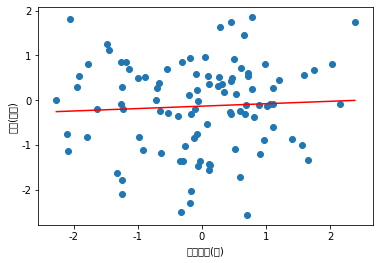

In [173]:
# 绘制回归直线
plt.xlabel(u'城市人口(万)')
plt.ylabel(u'利润(万元)')
plt.plot(XCopy[:,1], yHat,color='r')
plt.scatter(X[:,1].flatten(), Y.T.flatten())
plt.show()

（2）绘制代价曲线：

In [174]:
print(np.array(costs).max(),np.array(costs).min()) # 找到代价值的最大值、最小值，便于控制y轴范围

0.500046832733035 0.48944029236788594


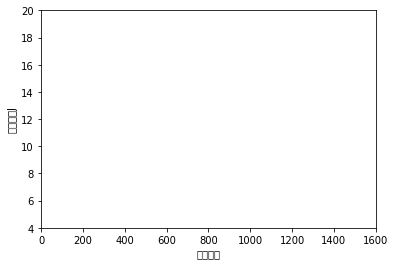

In [175]:
plt.xlim(-1,1600) # maxloop为1500
plt.ylim(4,20)  
plt.xlabel(u'迭代次数')
plt.ylabel(u'代价函数J')
plt.plot(range(len(costs)), costs)

（3）绘制梯度下降过程

In [176]:
print(np.array(thetas[0]).min(), np.array(thetas[0]).max())  #查看theta0的范围

[-0.13572323] 0.0


In [177]:
print(np.array(thetas[1]).min(), np.array(thetas[1]).max())  #查看theta1的范围

0.0 0.05412658026022891


In [178]:
# 准备网格数据，以备画梯度下降过程图
%matplotlib
from mpl_toolkits.mplot3d import axes3d
size = 100
theta0Vals = np.linspace(-10,10, size)
theta1Vals = np.linspace(-2, 4, size)
JVals = np.zeros((size, size))   # 按照theta0Vals与theta1Vals 将JVals初始化为0
for i in range(size):
    for j in range(size):
        col = np.matrix([[theta0Vals[i]], [theta1Vals[j]]])
        JVals[i,j] = J(col, X, Y)

theta0Vals, theta1Vals = np.meshgrid(theta0Vals, theta1Vals)
JVals = JVals.T

Using matplotlib backend: MacOSX


In [179]:
# 绘制3D代价函数图形
contourSurf = plt.figure()
ax = contourSurf.gca(projection='3d')

ax.plot_surface(theta0Vals, theta1Vals, JVals,  rstride=2, cstride=2, alpha=0.3,
                cmap=matplotlib.cm.rainbow, linewidth=0, antialiased=False)
ax.plot(theta[0], theta[1], 'rx')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')

Text(0.5, 0, '$J(\\theta)$')

（4）绘制等高线图，查看下降过程

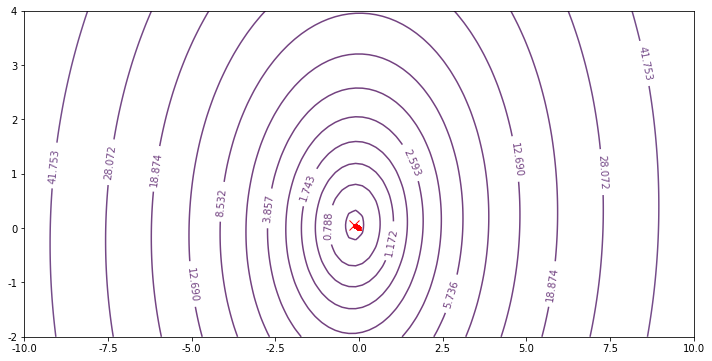

In [180]:
# 绘制代价函数等高线图
%matplotlib inline
plt.figure(figsize=(12,6))
CS = plt.contour(theta0Vals, theta1Vals, JVals, np.logspace(-2,3,30), alpha=.75)
plt.clabel(CS, inline=1, fontsize=10)

# 绘制最优解
plt.plot(theta[0,0], theta[1,0], 'rx', markersize=10, linewidth=3)

# 绘制梯度下降过程
plt.plot(thetas[0], thetas[1], 'rx', markersize=3, linewidth=1) # 每一次theta取值
plt.plot(thetas[0], thetas[1], 'r-',markersize=3, linewidth=1) # 用线连起来